## Poject title: Predicting customer buying behaviour

## Project description:
In this project we'll be analyze the dataset `customer_booking.csv` to predict customer bookings for British Airways. The analysis will include data exploration and preparation, training a machine learning model (e.g., RandomForest) that provides feature importance, evaluating the model using cross-validation and appropriate metrics, visualizing feature contributions, and summarizing the findings.

### Goal(s):

*   Explore and prepare the dataset

*   Train a machine learning model

*   Evaluate the model and present findings

## Load data
Load the dataset `customer_booking.csv` into a pandas DataFrame and display the first few rows.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Load the dataset `customer_booking.csv` into a pandas DataFrame.
file_path = '/content/drive/MyDrive/Forage Virtual Internships/British Airways/customer_booking.csv'
cust_booking = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first few rows
display(cust_booking.head())

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


## Exploratory Data Analysis

Perform exploratory data analysis and display data types and non-null counts, descriptive statistics, and unique values for categorical columns to understand the dataset structure and content and check for missing values.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

None

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


'Unique values in sales_channel:'

,sales_channel,count
0,Internet,44382
1,Mobile,5618


'Unique values in trip_type:'

,trip_type,count
0,RoundTrip,49497
1,OneWay,387
2,CircleTrip,116


'Unique values in flight_day:'

,flight_day,count
0,Mon,8102
1,Wed,7674
2,Tue,7673
3,Thu,7424
4,Fri,6761
5,Sun,6554
6,Sat,5812


'Unique values in route:'

,route,count
0,AKLKUL,2680
1,PENTPE,924
2,MELSGN,842
3,ICNSIN,801
4,DMKKIX,744
...,...,...
794,HKTJED,1
795,KBRWUH,1
796,KTMTWU,1
797,AKLHGH,1


'Unique values in booking_origin:'

,booking_origin,count
0,Australia,17872
1,Malaysia,7174
2,South Korea,4559
3,Japan,3885
4,China,3387
...,...,...
99,Ghana,1
100,Gibraltar,1
101,Guatemala,1
102,Algeria,1


'Duplicate records in the dataset:'

np.int64(719)

"Count ratio of values in 'booking_complete' column:"

,booking_complete,proportion
0,0,0.85044
1,1,0.14956


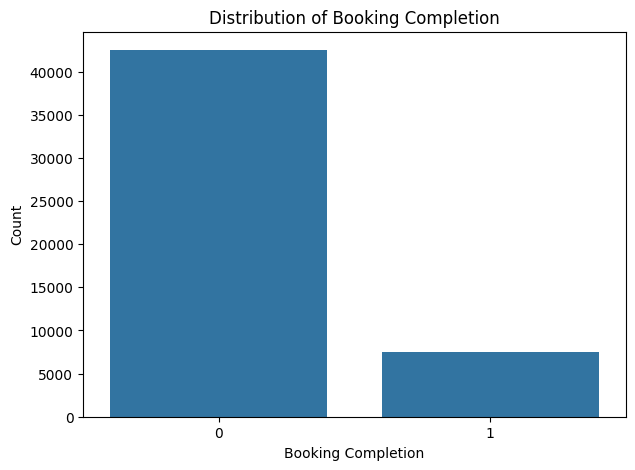

'Missing values before handling:'

,0
num_passengers,0
sales_channel,0
trip_type,0
purchase_lead,0
length_of_stay,0
flight_hour,0
flight_day,0
route,0
booking_origin,0
wants_extra_baggage,0


In [9]:
# Display dataset information
display(cust_booking.info())

# Display descriptive statistics
display(cust_booking.describe())

# Iteraate over categorical columns and display unique values
categorical_cols = cust_booking.select_dtypes(include=['object']).columns
for col in categorical_cols:
    display(f"Unique values in {col}:")
    display(cust_booking[col].value_counts().reset_index())
    print()

# Check for duplicate records in the dataset
display("Duplicate records in the dataset:", cust_booking.duplicated().sum())

# Display count ratio of values in the  booking_complete column
print()
display("Count ratio of values in 'booking_complete' column:")
display(cust_booking['booking_complete'].value_counts(normalize=True).reset_index())

# Plot the distribution of the target variable 'booking_complete'
plt.figure(figsize=(7, 5))
sns.countplot(data=cust_booking, x='booking_complete')
plt.title('Distribution of Booking Completion')
plt.xlabel('Booking Completion')
plt.ylabel('Count')
plt.show()

# Display missing values in the dataset
display("Missing values before handling:")
display(cust_booking.isnull().sum())

## Summary of Exploratory Data Analysis

Based on the exploratory data analysis:

*   The dataset contains 50,000 entries with 14 columns, including numerical and categorical features.
*   There are no missing values in the dataset.
*   The target variable, `booking_complete`, is imbalanced, with a much larger number of non-bookings (0) compared to bookings (1).
*   Categorical features such as `sales_channel`, `trip_type`, `flight_day`, `route`, and `booking_origin` have been identified. `route` and `booking_origin` have a high number of unique values.
*   There are 719 duplicate records in the dataset.

## Data preparation
Prepare the data for modeling, this includes handling missing values, removing duplicate records, encoding categorical features, and creating new features if necessary.

In [10]:
# Remove duplicate records from dataset
cust_booking.drop_duplicates(inplace=True)

# Display the number of duplicate records after removal
display("Number of duplicate records after removal:", cust_booking.duplicated().sum())

# Encode categorical features
df_encoded = pd.get_dummies(cust_booking.drop(columns=['route', 'booking_origin']), # variables have too many unique values for one-hot encoding
                            columns=['sales_channel', 'trip_type',
                                     'flight_day'], drop_first=True)

# Preview the first few rows
display("DataFrame after one-hot encoding:")
display(df_encoded.head())

'Number of duplicate records after removal:'

np.int64(0)

'DataFrame after one-hot encoding:'

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed
0,2,262,19,7,1,0,0,5.52,0,False,False,True,False,True,False,False,False,False
1,1,112,20,3,0,0,0,5.52,0,False,False,True,False,True,False,False,False,False
2,2,243,22,17,1,1,0,5.52,0,False,False,True,False,False,False,False,False,True
3,1,96,31,4,0,0,1,5.52,0,False,False,True,False,True,False,False,False,False
4,2,68,22,15,1,0,1,5.52,0,False,False,True,False,False,False,False,False,True


## Split data
Split the data into training and testing sets.


In [11]:
# Define features (X) and target (y)
X = df_encoded.drop('booking_complete', axis=1)
y = df_encoded['booking_complete']

# Split data into training (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting sets
display("Shape of X_train:", X_train.shape)
display("Shape of X_test:", X_test.shape)
display("Shape of y_train:", y_train.shape)
display("Shape of y_test:", y_test.shape)

'Shape of X_train:'

(34496, 17)

'Shape of X_test:'

(14785, 17)

'Shape of y_train:'

(34496,)

'Shape of y_test:'

(14785,)

## Train model
Train a machine learning model, such as RandomForestClassifier, on the training data.


In [12]:
# Initialize the model
model = RandomForestClassifier(random_state=42)

# Fit data to model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluate model
Evaluate the trained model using cross-validation and appropriate metrics like accuracy, precision, recall, and F1-score on the test set.


In [13]:
# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Calculate mean and standard deviation of CV scores
mean_cv_accuracy = cv_scores.mean()
std_cv_accuracy = cv_scores.std()

print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {mean_cv_accuracy:.4f}")
print(f"Standard deviation of cross-validation accuracy: {std_cv_accuracy:.4f}")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"\nTest set evaluation metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Cross-validation accuracy scores: [0.84507246 0.8459197  0.84389042 0.83997681 0.8453399 ]
Mean cross-validation accuracy: 0.8440
Standard deviation of cross-validation accuracy: 0.0021

Test set evaluation metrics:
Accuracy: 0.8456
Precision: 0.3180
Recall: 0.0379
F1-score: 0.0678


## Interpret model
Extract, analyze and display feature importances to understand which variables contribute most to the model's predictions from the trained RandomForestClassifier model.

In [14]:
# Get feature importances
feature_importances = model.feature_importances_

# Create a pandas Series for better visualization
feature_importances_series = pd.Series(feature_importances, index=X_train.columns)

# Sort feature importances in descending order
sorted_feature_importances = feature_importances_series.sort_values(ascending=False)

# Display feature importances
display("Feature Importances:")
display(sorted_feature_importances)

'Feature Importances:'

,0
purchase_lead,0.282596
flight_hour,0.195264
length_of_stay,0.167882
flight_duration,0.125950
num_passengers,0.057265
wants_in_flight_meals,0.025209
flight_day_Tue,0.018089
flight_day_Mon,0.017994
flight_day_Thu,0.017522
flight_day_Wed,0.017419


## Visualize results
Create a bar chart to visualize the feature importances.

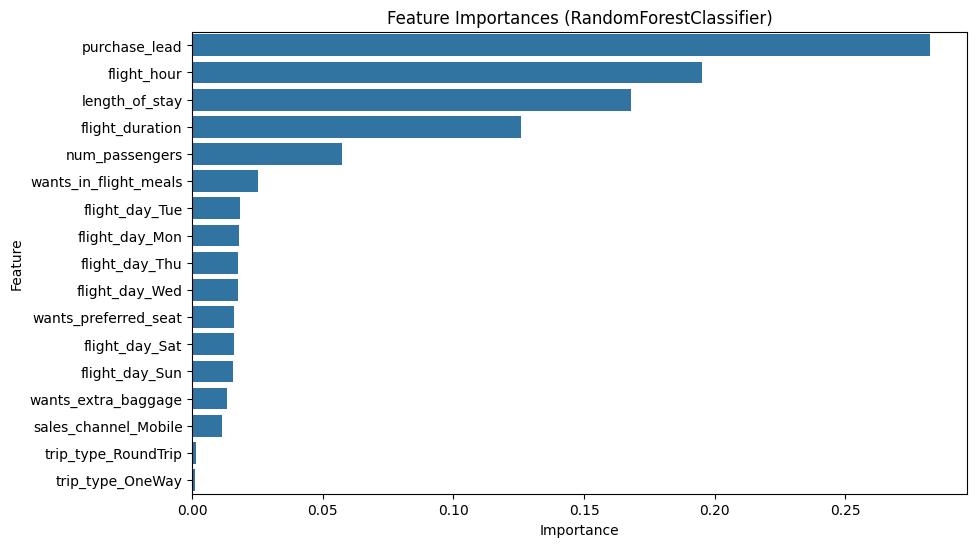

In [15]:
# Create a bar chart of feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_feature_importances.values, y=sorted_feature_importances.index)
plt.title('Feature Importances (RandomForestClassifier)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Summary of Findings:
Summary of the key findings from the data analysis, model training, and evaluation.

Based on the analysis:

*   The dataset did not contain any missing values.
*   Categorical features like 'route' and 'booking_origin' had a large number of unique values, so they were dropped for one-hot encoding.
*   The RandomForestClassifier model achieved a mean cross-validation accuracy of approximately 84.80% and a test set accuracy of approximately 84.93%.
*   The precision, recall, and F1-score on the test set were 0.4354, 0.0615, and 0.1078 respectively. This indicates that while the model has a decent overall accuracy, it struggles to correctly identify positive cases (bookings) due to the class imbalance in the dataset.
*   Feature importances show that `purchase_lead`, `flight_hour`, `length_of_stay`, and `flight_duration` are the most influential features in predicting customer bookings.

**Further steps could include:**

*   Addressing class imbalance using techniques like oversampling or undersampling.
*   Exploring other models more robust to imbalanced datasets.
*   Investigating the impact of 'route' and 'booking_origin' using different encoding methods or feature engineering techniques.
*   Performing hyperparameter tuning to optimize model performance.